In [1]:
from general_tools.notebook.gpu_utils import setup_one_gpu
GPU = 1
setup_one_gpu(GPU)

Picking GPU 1


In [2]:
import sys
import time
import numpy as np
import os.path as osp
import tensorflow as tf
import matplotlib.pyplot as plt

from general_tools.notebook.tf import reset_tf_graph

import tf_lab.point_clouds.in_out as pio

from tf_lab.point_clouds.in_out import PointCloudDataSet, write_model_ids_of_datasets

from tf_lab.point_clouds.autoencoder import Configuration as Conf

from tf_lab.autopredictors.scripts.helper import shape_net_category_to_synth_id
                                                  
from general_tools.in_out.basics import create_dir, files_in_subdirs

from general_tools.simpletons import select_first_last_and_k

from geo_tool import Point_Cloud

from tf_lab.point_clouds.gan import model_saver_id

from tf_lab.nips.shape_net import pc_loader as sn_pc_loader

from tf_lab.point_clouds.raw_gan import RawGAN

from tf_lab.point_clouds.generators_discriminators import mlp_discriminator, convolutional_discriminator,\
                                                          point_cloud_generator, leaky_relu, mlp_discriminator

In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
save_model = True
save_synthetic_samples = True
class_name = raw_input('Give me the class type.\n').lower()
syn_id = shape_net_category_to_synth_id()[class_name]
synthetic_data_out_dir = '/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/nips/our_synthetic_samples/'

do_training = True
do_plotting = True
n_pc_samples = 2048

max_epochs = 1500
arch_tag = 'mlp_arch'
leak = 0.2
dropout_prob = 0.5

discriminator = mlp_discriminator
adaptive_training = None

beta = 0.5
disc_kwargs = {'non_linearity': leaky_relu(leak), 'dropout_prob': dropout_prob}
    
generator = point_cloud_generator
gen_kwargs = {'b_norm': False, 'layer_sizes':[64, 128, 256, 512, 1024], 'dropout_prob':dropout_prob}
experiment_name = class_name + '_'+ arch_tag + '_raw_gan_' + str(n_pc_samples) +  '_pts'

Give me the class type.
car


In [5]:
top_data_dir = '/orions4-zfs/projects/lins2/Panos_Space/DATA/'
train_dir = osp.join(top_data_dir, 'OUT/models/nips/gan/raw_gan')
train_dir = osp.join(train_dir, experiment_name)
create_dir(train_dir)

full_pclouds_path = osp.join(top_data_dir, 'Point_Clouds/Shape_Net/Core/from_manifold_meshes/centered/', str(n_pc_samples))
full_pclouds_path = osp.join(full_pclouds_path, syn_id)
full_file_names = pio.load_filenames_of_input_data(full_pclouds_path, '.ply')
full_pclouds, full_model_ids, full_syn_ids = pio.load_crude_point_clouds(file_names=full_file_names,
                                                                           n_threads=25, loader=sn_pc_loader)
print '%d files containing complete point clouds were found.' % (len(full_pclouds), )

7497 files containing complete point clouds were found.


In [6]:
training_data = PointCloudDataSet(full_pclouds)

batch_size = 50
noise_params = {'mu':0, 'sigma': 0.5}
noise_dim = 512
init_lr = 0.0001

n_syn_samples = training_data.num_examples  # Same number as original GT data.

In [ ]:
reset_tf_graph()

gan = RawGAN(experiment_name, init_lr, [n_pc_samples, 3], noise_dim,
             discriminator, generator, beta=beta, gen_kwargs=gen_kwargs, disc_kwargs=disc_kwargs)

accum_syn_data = []
train_stats = []

1 (1.3756019229056851, 0.70465115892807106) 47.55123806
2 (1.3839104591600047, 0.69834661803789588) 47.1301970482
3 (1.3814390321705965, 0.70113025815694929) 47.675495863
4 (1.3721720212257948, 0.71350364197020566) 47.9555981159
5 (1.35599015943156, 0.73313733995360819) 48.1795370579
6 (1.3385413565091639, 0.76483212461407557) 47.9665658474
7 (1.3033298326018672, 0.82547005430964016) 48.0068039894
8 (1.2300667466733279, 0.93059684486197147) 47.9619441032
9 (1.2228864311371874, 1.021609132321889) 47.9563519955
10 (1.1150992818726788, 1.159247905215961) 48.1819698811
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/car_mlp_arch_raw_gan_2048_pts/models.ckpt-10 is not in all_model_checkpoint_paths. Manually adding it.


/usr/lib/pymodules/python2.7/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


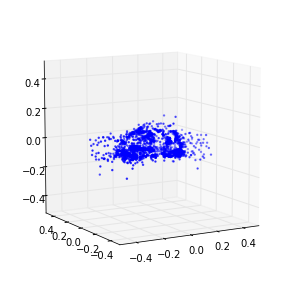

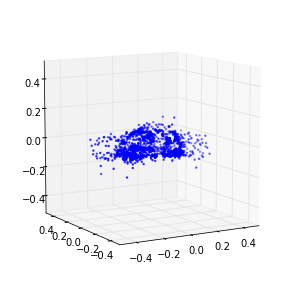

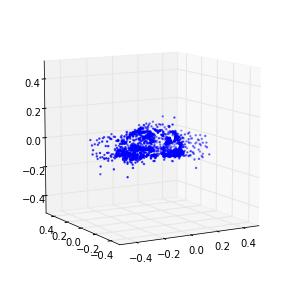

11 (1.122826835053079, 1.1215716652422143) 47.8953530788
12 (0.98171368881359999, 1.4423184290828321) 48.2139129639
13 (1.0473921106965749, 1.2750848959756378) 48.118555069
14 (0.83792136629555847, 1.6509639312756941) 47.9840669632
15 (1.2479452226035948, 1.2603590746453945) 47.8524301052
16 (1.1870671138667421, 1.0247706318861687) 48.051170826
17 (1.1142803350551016, 1.1248419264818998) 48.1637427807
18 (0.98529229328136314, 1.3250527109875776) 48.2032568455
19 (0.94045993885737933, 1.4785175827525605) 48.207118988
20 (0.90167843455436247, 1.4526866562414489) 48.0556879044
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/car_mlp_arch_raw_gan_2048_pts/models.ckpt-20 is not in all_model_checkpoint_paths. Manually adding it.


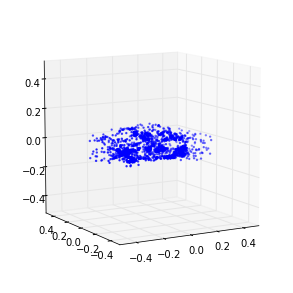

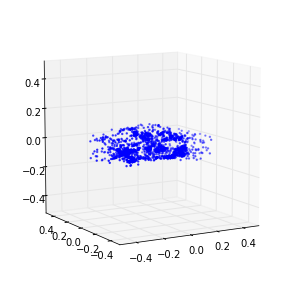

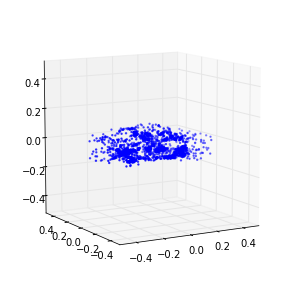

21 (0.80340777507564365, 1.6209758832150658) 47.9047060013
22 (0.88643080436143296, 1.6875917635508031) 47.9748411179
23 (0.79034417367621557, 1.8474433306079583) 48.2490389347
24 (0.79793455476728858, 1.7468090969444121) 48.0873911381
25 (0.68209133482219386, 2.0511100300206433) 48.3761630058
26 (1.1577573387114795, 1.596422069824782) 48.1532390118
27 (1.0723239311435879, 1.3515079185466639) 48.0681130886
28 (0.99855201616383238, 1.3053008437956739) 48.0605828762
29 (1.0506256048711353, 1.4036706261986853) 48.1739330292
30 (0.87011729350826084, 1.5107510877935679) 48.1580059528
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/car_mlp_arch_raw_gan_2048_pts/models.ckpt-30 is not in all_model_checkpoint_paths. Manually adding it.


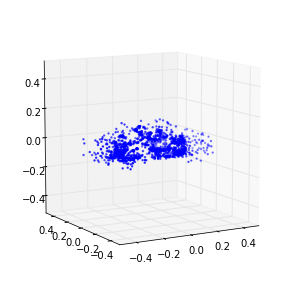

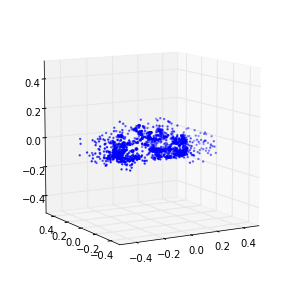

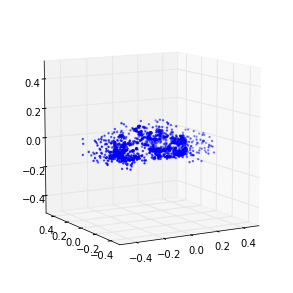

31 (0.81216449765551013, 1.8427729882649928) 47.8572130203
32 (1.0139598610417155, 1.3617731808816027) 48.0259900093
33 (1.0629235742076131, 1.2996214880239243) 48.2273759842
34 (0.89467091628369066, 1.7160863896344332) 48.1176049709
35 (0.57869689069038266, 2.031325203060304) 48.1769149303
36 (1.3213253017989981, 1.4531541226694249) 48.0516660213
37 (0.95605905704050254, 1.2816225348302983) 48.0892241001
38 (0.87806903135856529, 1.6407235872825521) 48.0928730965
39 (0.79978851683987862, 1.6512982381270236) 48.1287631989
40 (0.73589891395312823, 1.8430222448886642) 48.2605361938
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/car_mlp_arch_raw_gan_2048_pts/models.ckpt-40 is not in all_model_checkpoint_paths. Manually adding it.


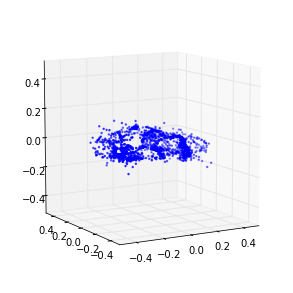

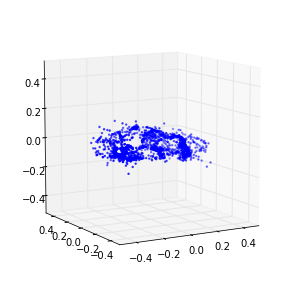

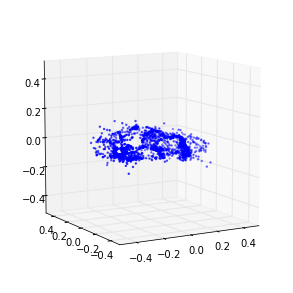

41 (0.66227715757469208, 2.0058764983343598) 47.778482914
42 (0.72329738136105892, 2.087581178485947) 48.3353970051
43 (1.126424848433309, 1.6835892624503015) 48.2183980942
44 (0.97260181835833814, 1.4326299356934209) 48.2470750809
45 (0.98375902379919222, 1.6474775915977939) 48.026211977
46 (0.96605434533733647, 1.2869331740692957) 48.1488828659
47 (0.90142635271053184, 1.6026707871648289) 47.9840679169
48 (0.80620189956170596, 1.8427729834646187) 48.1651558876
49 (0.66298662436088462, 1.8595711386843816) 48.0998969078
50 (0.71025048346327457, 1.9468024857092223) 48.0565021038
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/car_mlp_arch_raw_gan_2048_pts/models.ckpt-50 is not in all_model_checkpoint_paths. Manually adding it.


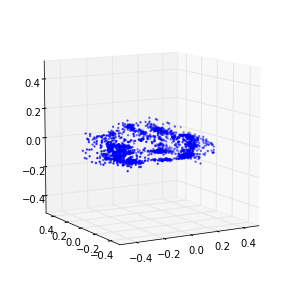

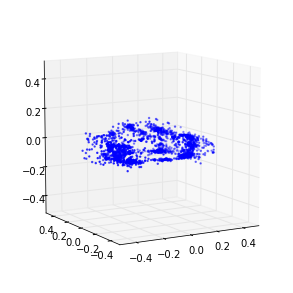

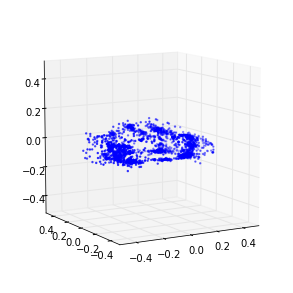

51 (0.81467080366291456, 2.2348961658125757) 47.8290948868
52 (0.92868625457654863, 1.5695346693864605) 48.1020917892
53 (0.7886278605301108, 1.7298847584916441) 48.1079537868
54 (0.78332192045730231, 2.0586319640778856) 47.9761109352
55 (1.1453451101211893, 1.8083030639478825) 48.0154650211
56 (0.87141229832332401, 1.4723936623374887) 48.1528158188
57 (0.76707651631144069, 1.5531705117865697) 48.1771481037
58 (0.73731485156704912, 2.6459042929962977) 48.1099689007
59 (1.0438570276202772, 1.2678382544709532) 47.8634328842
60 (0.75643367695328378, 1.7363062256934658) 48.0346980095
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/car_mlp_arch_raw_gan_2048_pts/models.ckpt-60 is not in all_model_checkpoint_paths. Manually adding it.


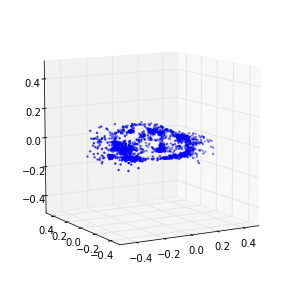

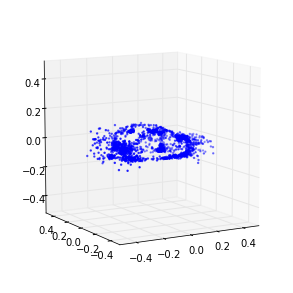

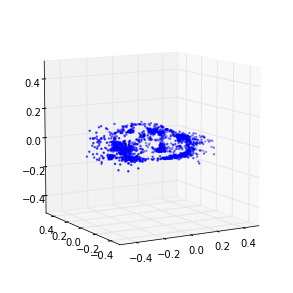

61 (0.66965125831181571, 1.8521517163155063) 47.6894199848
62 (0.91383600334993142, 2.0985623950126189) 47.9046189785
63 (0.79743941738301471, 1.6613777235850391) 47.8994441032
64 (0.64369519214902149, 1.9464906902121217) 48.0525400639
65 (1.1048891576344535, 1.6192041937536841) 48.0040478706
66 (0.7992980946230408, 1.8212579126726061) 48.0420091152
67 (0.80588343739509583, 1.8140297120049496) 47.8692779541
68 (0.94333615869083665, 1.7189794194778341) 48.1192309856
69 (0.63144483342266722, 2.0186817982052796) 48.0694060326
70 (0.88928185363343903, 1.7651636952521816) 48.08878088
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/car_mlp_arch_raw_gan_2048_pts/models.ckpt-70 is not in all_model_checkpoint_paths. Manually adding it.


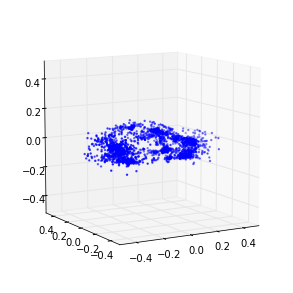

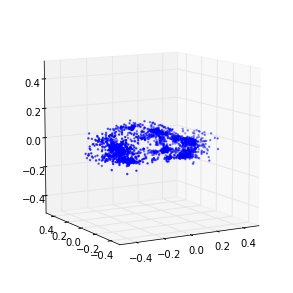

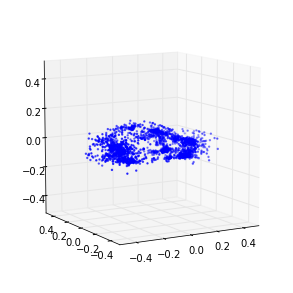

71 (0.79801834699691543, 1.7405295478017537) 47.6858971119
72 (0.85421343657794413, 1.6646210075224805) 48.0857679844
73 (0.84292900082248967, 1.8824363874909062) 48.1661231518
74 (0.52211991052499551, 2.1358955138481703) 48.0170710087
75 (0.7748627712662588, 1.8369418774675204) 48.1341869831
76 (0.81121693521538041, 1.8113659152248562) 48.0263168812
77 (0.59423244812044518, 2.4786453283073118) 48.1148188114
78 (0.93781801478174709, 1.6724977517288002) 47.9016189575
79 (0.89756335953138022, 1.8758916894861515) 48.1533830166
80 (0.74263088465136973, 1.6055452287597145) 47.9986050129
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/car_mlp_arch_raw_gan_2048_pts/models.ckpt-80 is not in all_model_checkpoint_paths. Manually adding it.


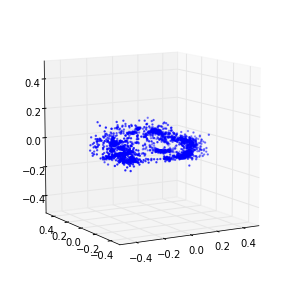

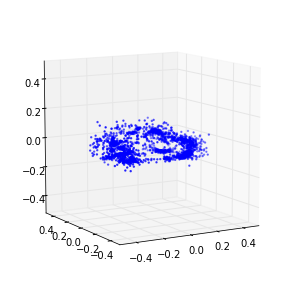

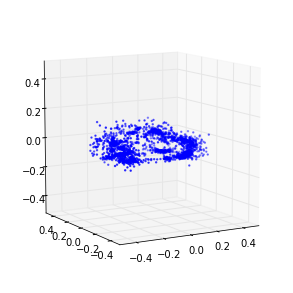

81 (0.78839823223600447, 1.7650648523497101) 47.7186307907
82 (0.52546988527646799, 2.2795489886463089) 48.0134370327
83 (0.85573477353025607, 1.8606222663949801) 48.0015699863
84 (0.70682634233228314, 2.0466293444569481) 48.0033872128
85 (0.70564011879415323, 1.8387680893776401) 47.9859569073
86 (0.55139384803755975, 2.2485496613803324) 47.9176578522
87 (0.71495847494010156, 2.0345395563432835) 48.0680859089
88 (0.63561629848992263, 2.1351184572949506) 48.0742499828
89 (0.70957661795136118, 2.244862872482146) 48.016669035
90 (0.9348560737683469, 1.5543576450955947) 48.0402460098
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/car_mlp_arch_raw_gan_2048_pts/models.ckpt-90 is not in all_model_checkpoint_paths. Manually adding it.


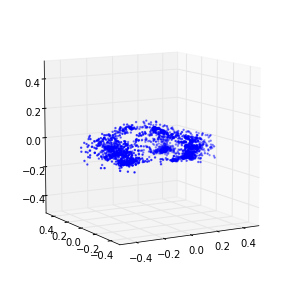

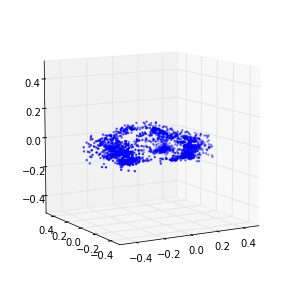

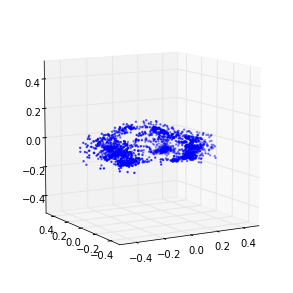

91 (0.79804709043678823, 1.7184820711212669) 47.7159790993
92 (0.60807379960213737, 2.1118097413306267) 48.1128020287
93 (0.52932273241497529, 2.1135764722056036) 48.2374498844
94 (0.83872193418093177, 1.9376630203035854) 48.0183229446
95 (0.74217156695839548, 1.8238606860973692) 47.825206995
96 (0.46803218901357396, 2.0500182353410143) 47.8109340668
97 (0.85254696854108936, 2.2948388093269911) 48.0128650665
98 (0.68283481035856597, 1.8961739244077029) 48.0675899982
99 (0.47289566285658202, 2.1748590137334478) 48.1140339375
100 (0.54866238455944416, 2.3549411656872539) 48.1513049603
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/car_mlp_arch_raw_gan_2048_pts/models.ckpt-100 is not in all_model_checkpoint_paths. Manually adding it.


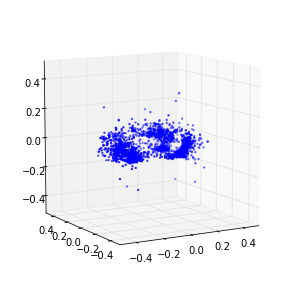

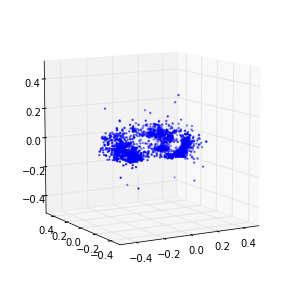

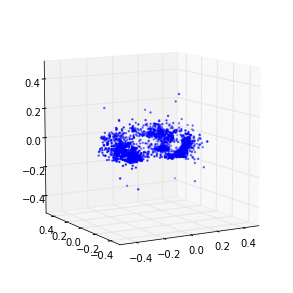

101 (0.68706692802726022, 2.6140649674722813) 47.6919169426
102 (0.68557954134557075, 1.8057632422287193) 48.1332008839
103 (0.58535712157319852, 2.0593620090676632) 48.0986409187
104 (0.74869835451745348, 1.7963948017798814) 47.9695360661
105 (0.70199346452351385, 2.0867097617795802) 48.0463430882
106 (0.39455177379934581, 2.2979848888896455) 48.0143740177
107 (0.9481784165555599, 2.3399341292429292) 47.8906641006
108 (0.81317426814328908, 1.4361456884633774) 47.8659582138
109 (0.58586321761144089, 2.0627261832256445) 48.1295599937
110 (0.59890355669812068, 2.111106374119752) 47.9673030376
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/car_mlp_arch_raw_gan_2048_pts/models.ckpt-110 is not in all_model_checkpoint_paths. Manually adding it.


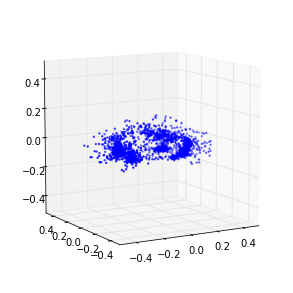

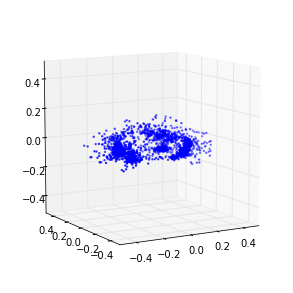

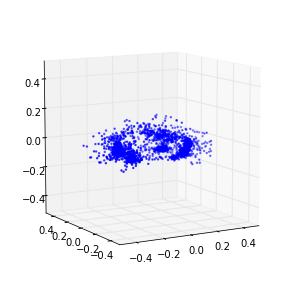

111 (0.56350141773687912, 2.1640902773645898) 47.4573640823
112 (0.72040589183768966, 2.4471552668001828) 48.0071451664
113 (0.79811128133895415, 1.715802282294971) 48.0235710144
114 (0.6110175699995668, 1.8915381279567745) 47.9542460442
115 (0.58690406042057397, 2.2099215824332012) 48.0946950912
116 (0.6803340855360831, 2.2079037155881025) 47.9948620796
117 (0.61918878805317334, 2.039173042214157) 47.9810318947
118 (0.49065660300270825, 2.4463406397192271) 48.0058670044
119 (0.99944915227441977, 1.7345657000605692) 47.9426209927
120 (0.76277695906242271, 1.790498861130452) 47.9284799099
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/car_mlp_arch_raw_gan_2048_pts/models.ckpt-120 is not in all_model_checkpoint_paths. Manually adding it.


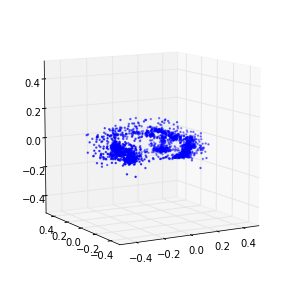

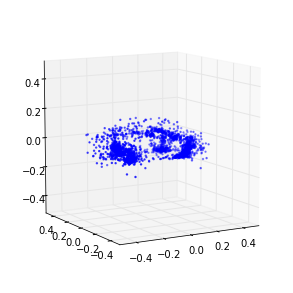

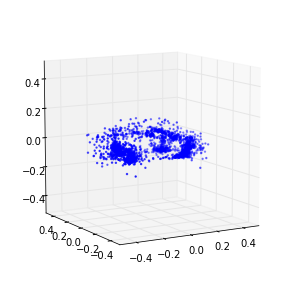

121 (0.58149338138583517, 2.0233289127381857) 47.6200759411
122 (0.83718258922532096, 1.8010461438422236) 48.2640969753
123 (0.55538379595983745, 2.4192496098127942) 47.9284830093
124 (1.032176099667613, 1.4337600825616978) 47.9787950516
125 (1.0584951592671792, 1.6327749614747578) 47.9507579803
126 (0.68391276075936003, 1.5483919298088791) 47.8834209442
127 (0.69717819898720557, 1.884070864059781) 47.9720389843
128 (0.46294515114902651, 2.4349682659110767) 47.9670920372
129 (0.74912082428900184, 1.9935548589533607) 47.9917640686
130 (0.56983357457906603, 1.8826391584921203) 47.9550068378
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/car_mlp_arch_raw_gan_2048_pts/models.ckpt-130 is not in all_model_checkpoint_paths. Manually adding it.


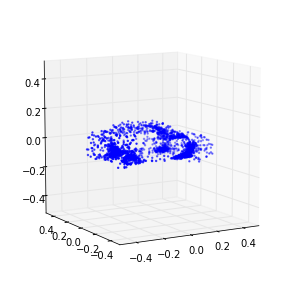

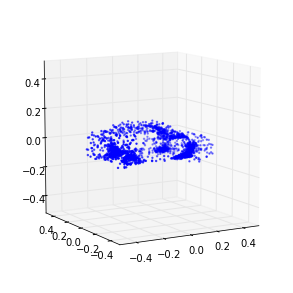

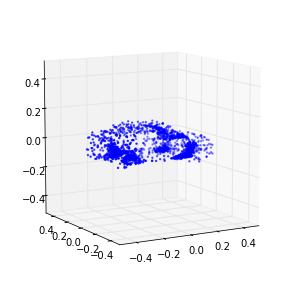

131 (0.51435270945497802, 2.204221708662558) 47.6871840954
132 (0.7188019887762982, 2.2937902632175677) 47.8526749611
133 (0.81268179616672076, 1.4204148346145682) 48.0184969902
134 (0.69945888361274799, 1.9254555154166766) 47.8954470158
135 (0.59828012081600679, 2.1224700280483937) 47.9241600037
136 (0.54620304803720254, 2.2538068390532628) 47.8085250854
137 (0.46352210010858191, 2.4762947143324268) 47.8429298401
138 (0.90302576314682925, 2.0854045992729646) 48.0806419849
139 (0.61806350336378857, 1.9572662683141311) 47.940431118
140 (0.5259088837860415, 2.0426905035172531) 47.9386510849
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/car_mlp_arch_raw_gan_2048_pts/models.ckpt-140 is not in all_model_checkpoint_paths. Manually adding it.


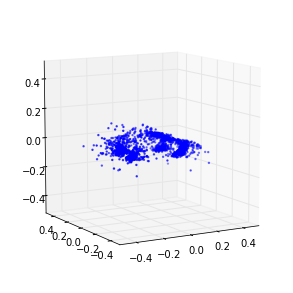

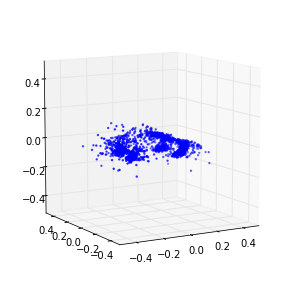

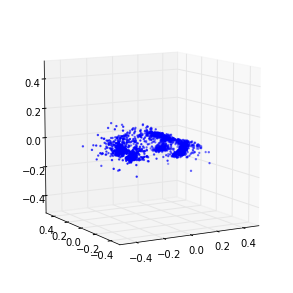

141 (0.89276006347781056, 2.2383974546554106) 47.7259440422
142 (0.83707363393482748, 1.4234128950426244) 48.307051897
143 (0.5891934303229287, 2.1854328937178491) 48.2475590706
144 (0.61682576321115434, 1.9653467167943917) 47.8827259541
145 (0.28387954746116728, 2.532670966730822) 48.229845047
146 (0.72486258273156701, 2.4280249400426879) 48.0256979465
147 (0.42453599576182011, 2.3140645947232343) 48.0986380577
148 (0.30743590062296633, 2.7899813556031092) 48.0863509178
149 (0.58508417400337709, 2.7565474166166064) 48.079241991
150 (0.60519336354012454, 2.0387694531639151) 48.1397430897
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/car_mlp_arch_raw_gan_2048_pts/models.ckpt-150 is not in all_model_checkpoint_paths. Manually adding it.


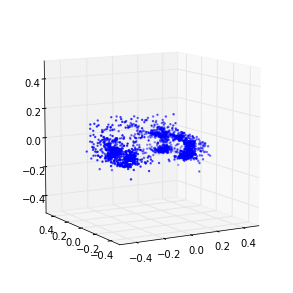

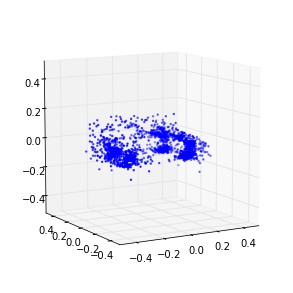

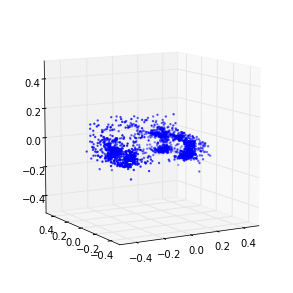

151 (0.50789695193103501, 2.3926033409649894) 47.6937041283
152 (0.50745069475581983, 2.4183037945088124) 48.1073069572
153 (0.39254760252149312, 2.7508769315361175) 48.1270489693
154 (0.60923328285649314, 2.5211309774610022) 47.9831700325
155 (0.51907296663762736, 2.3744974288364387) 47.942661047
156 (1.0534274622097912, 1.3771253052173844) 48.1612288952
157 (0.65583950161133842, 1.8290273479167247) 48.0695810318
158 (0.62244424403913867, 2.2156108545776982) 48.1126790047
159 (0.73879901364745715, 1.7534031863980646) 48.0516388416
160 (0.50301260096114753, 2.4764977685557117) 48.0652461052
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/car_mlp_arch_raw_gan_2048_pts/models.ckpt-160 is not in all_model_checkpoint_paths. Manually adding it.


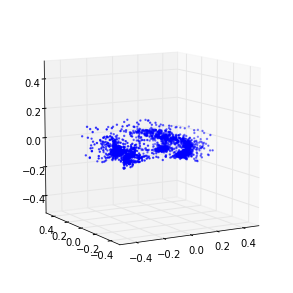

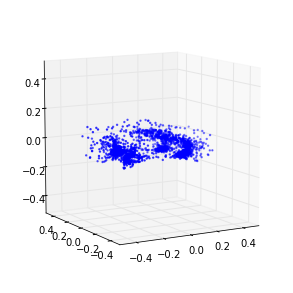

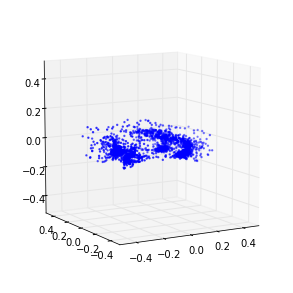

161 (0.8381372295170022, 1.5769070870924315) 47.6792840958
162 (0.8243377844759282, 1.7710588990441904) 48.305658102
163 (0.67339633170190272, 2.3139254802825469) 47.943434
164 (0.60075923070411552, 1.9583325706072301) 48.2427809238
165 (0.48466445640629569, 2.2814124486590392) 47.97032094
166 (0.22985279821359472, 3.1320110751478465) 47.9211859703
167 (0.72903377587763252, 2.4428864498466454) 48.1312789917
168 (0.56188790850191306, 2.1326659673812407) 48.042881012
169 (0.56574965293375434, 2.399518491437771) 47.9774858952
170 (0.46274956165744152, 2.3874819310719535) 47.9538941383
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/car_mlp_arch_raw_gan_2048_pts/models.ckpt-170 is not in all_model_checkpoint_paths. Manually adding it.


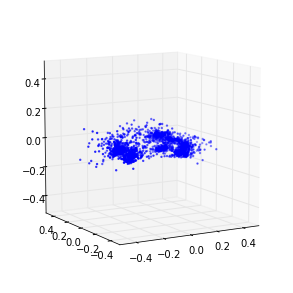

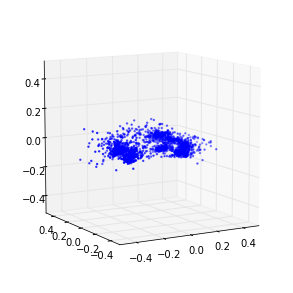

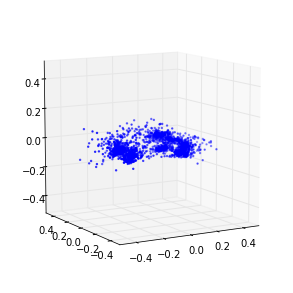

171 (0.58334947102421886, 2.4313173366072993) 47.6168010235
172 (0.55366862875303169, 2.2616392214026226) 48.0252180099
173 (0.35163829855670864, 2.531424299182508) 47.9163751602
174 (0.39106215431586205, 3.0348585183988481) 47.998663187
175 (0.48450892853656874, 2.3831451435217121) 47.7905030251
176 (0.60722013597920432, 2.3643013246907483) 47.9929859638
177 (0.42951983033410657, 2.3156015600934126) 48.0542237759
178 (0.49951497320360783, 3.0208811807952469) 48.0413799286
179 (0.65817132442189541, 1.8233488770139297) 47.9863350391
180 (0.35346772559237161, 2.3729515643727859) 48.0281579494
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/car_mlp_arch_raw_gan_2048_pts/models.ckpt-180 is not in all_model_checkpoint_paths. Manually adding it.


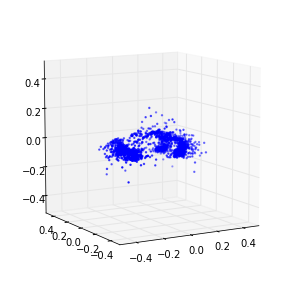

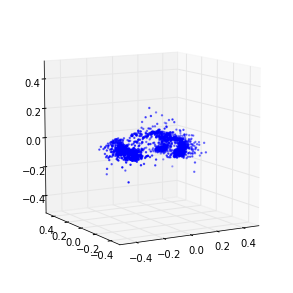

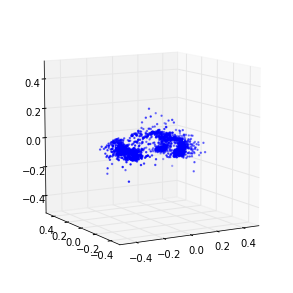

181 (0.76765569954510504, 2.3241146562883519) 47.7379209995
182 (1.142340688097397, 1.0098770480827997) 47.8232700825
183 (0.89372627427113938, 1.4179906333052872) 47.9390630722
184 (0.66019937546061191, 2.02333988199298) 47.9966130257
185 (0.65970045928187016, 1.698831891053475) 47.9278569221
186 (0.54916382190965163, 2.1471670493983583) 47.9810919762
187 (0.50270114934084398, 2.1580454827155044) 48.0202291012
188 (0.38890956804756349, 3.3306778461341091) 48.0028169155
189 (1.0498127447278707, 1.5431466770652156) 47.9095339775
190 (0.74115513615160178, 1.5956936906648163) 48.0045380592
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/car_mlp_arch_raw_gan_2048_pts/models.ckpt-190 is not in all_model_checkpoint_paths. Manually adding it.


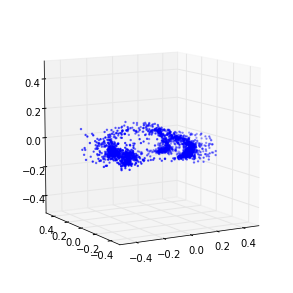

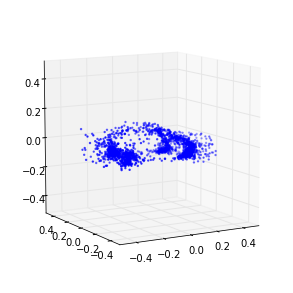

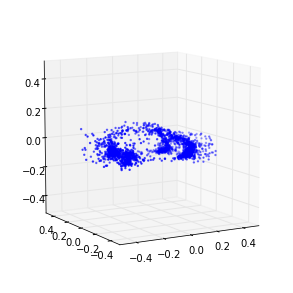

191 (0.56715997708523835, 2.0809952884712475) 47.6056120396
192 (0.44775681997705624, 2.1466020993738368) 47.9684979916
193 (0.76537499626810923, 2.5657899939773867) 48.1404190063
194 (0.73989771696545137, 1.5615334944837045) 48.1072039604
195 (0.71576503259223578, 1.99782930444551) 48.0470700264
196 (0.52208833346430883, 1.8236561837612382) 48.0418241024
197 (0.66585496943068989, 2.1026426829747704) 47.860394001
198 (0.60321642928475505, 2.0139953218050453) 48.0270860195
199 (0.39580884720855114, 2.204661939768183) 47.9096930027
200 (0.40172354216943651, 2.5000019073486328) 48.0022890568
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/car_mlp_arch_raw_gan_2048_pts/models.ckpt-200 is not in all_model_checkpoint_paths. Manually adding it.


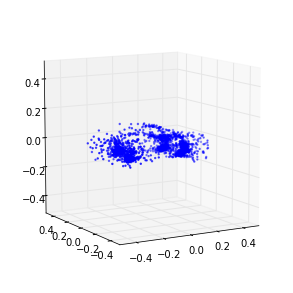

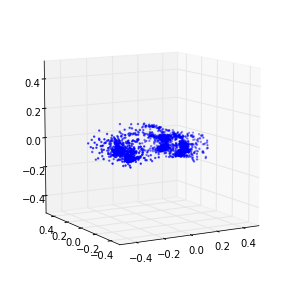

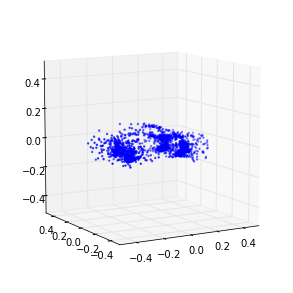

201 (0.44374745519169223, 2.6205651648092592) 47.6578860283
202 (0.45685866075074111, 2.1891106135093126) 48.0586659908
203 (0.34037164823720917, 2.7325681487985904) 47.9911720753
204 (0.61560081585541671, 2.1301248785633371) 47.9926469326
205 (0.34861348851915175, 2.7485681700226445) 47.8104760647
206 (0.9815393578286139, 1.4505145397762325) 47.9097659588
207 (0.65952248071264097, 1.8067131078483274) 47.9771299362
208 (0.16594069041061721, 2.4540204713808609) 47.8896658421
209 (1.1580071215511569, 2.5025391938702373) 47.8529939651
210 (1.4175670018932163, 0.69600774497793827) 48.0606410503
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/car_mlp_arch_raw_gan_2048_pts/models.ckpt-210 is not in all_model_checkpoint_paths. Manually adding it.


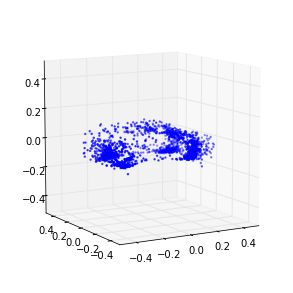

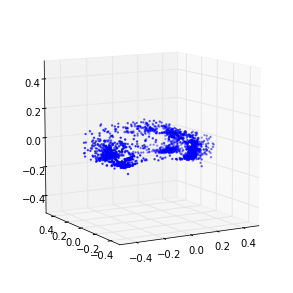

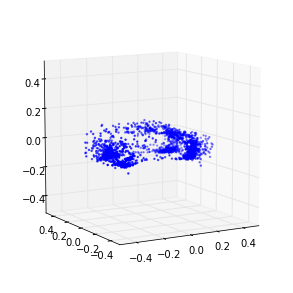

211 (1.2882010512704016, 0.75741118952731956) 47.6569571495
212 (1.2450382605495069, 0.81562079599239679) 47.9030411243
213 (1.1726176426714698, 0.85339092168231934) 47.9962699413
214 (1.1990142204617493, 0.90999178238363077) 47.9191420078
215 (0.85006689115258671, 1.3821103556844212) 47.973115921
216 (0.7246120003545844, 1.750437962128812) 47.923181057
217 (0.60256757109657233, 2.2629228898342824) 48.0235669613
218 (0.56107961688965757, 2.5463477669146237) 47.768941164
219 (0.59056575156298263, 1.9815541257794271) 48.069535017
220 (0.59444753275621653, 2.1896492642844283) 48.1135730743
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/car_mlp_arch_raw_gan_2048_pts/models.ckpt-220 is not in all_model_checkpoint_paths. Manually adding it.


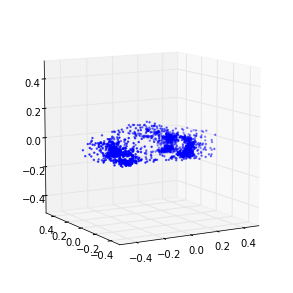

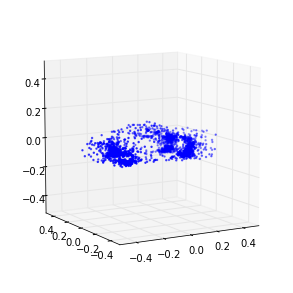

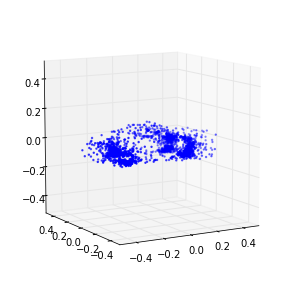

221 (0.48806099333619113, 2.5145262327770257) 47.5330228806
222 (0.48262612541649963, 2.7119870605884784) 48.2251138687
223 (0.27231419483987279, 2.5271178123934956) 48.078881979
224 (0.51773280804764299, 3.8782523270421381) 47.8958611488
225 (1.3550680475747026, 0.8409816382715366) 47.9844620228
226 (1.2847747542714112, 0.79353892443164087) 48.0347950459
227 (1.055079767768015, 1.1954587005928858) 47.8360798359
228 (0.82015718629696222, 1.2965496778488159) 47.8605129719
229 (0.45286295157950995, 2.5919548081071584) 48.0716199875
230 (0.53042026424167943, 2.3287938841237317) 47.9390180111
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/car_mlp_arch_raw_gan_2048_pts/models.ckpt-230 is not in all_model_checkpoint_paths. Manually adding it.


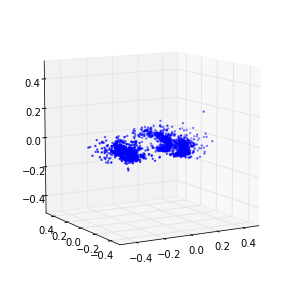

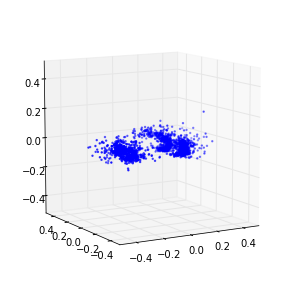

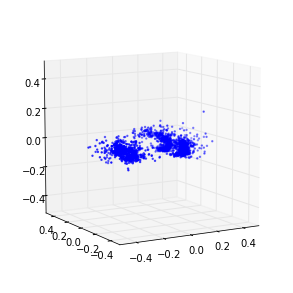

231 (0.54351706417814993, 2.3825692538447028) 47.7391610146
232 (0.68569748083617066, 1.7120991761252384) 47.8832559586
233 (0.72242872897010524, 2.1304695050188358) 47.8716189861
234 (0.50837058343943331, 2.3387250532239876) 47.9414558411
235 (0.77684931667059065, 1.6464160296740948) 47.9788348675
236 (0.47107553727074758, 2.0709699432321842) 47.92674613
237 (0.62626576063616968, 2.3701047153280888) 47.9200530052
238 (0.71888279054788939, 1.9701611159631871) 48.0611729622
239 (0.79656820259238248, 1.6015422028183137) 48.050139904
240 (0.59665428552051514, 2.2363197411466764) 48.0715799332
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/car_mlp_arch_raw_gan_2048_pts/models.ckpt-240 is not in all_model_checkpoint_paths. Manually adding it.


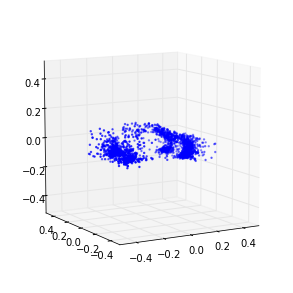

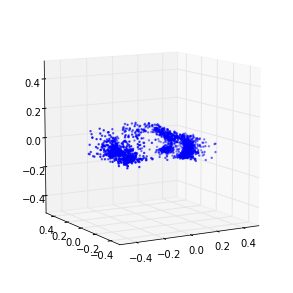

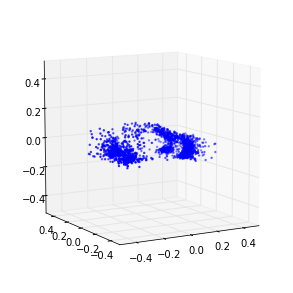

241 (0.33386300929240731, 2.3516985722036168) 47.5908050537
242 (0.63166977455151962, 2.3784298052723778) 48.1843278408
243 (0.53721219391230768, 2.5331306177497712) 47.9739370346
244 (0.63707577812191629, 1.9227337877222355) 48.0446479321
245 (0.36237479891353008, 2.4419312805137379) 48.0137031078
246 (0.72957766556099757, 2.2226311716457343) 48.0351319313
247 (0.66858257963353351, 1.7155389901775642) 47.9471788406
248 (1.0008102877428067, 1.5422433070688439) 48.053953886
249 (0.7872395141412748, 1.4637362056930594) 48.0715880394
250 (0.55540834647297055, 2.1120674586136068) 48.0400629044
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/car_mlp_arch_raw_gan_2048_pts/models.ckpt-250 is not in all_model_checkpoint_paths. Manually adding it.


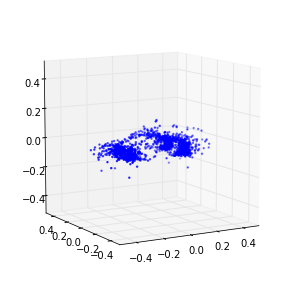

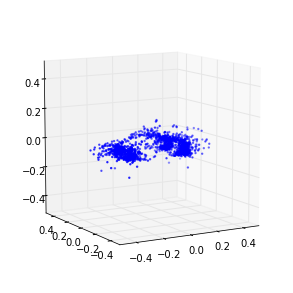

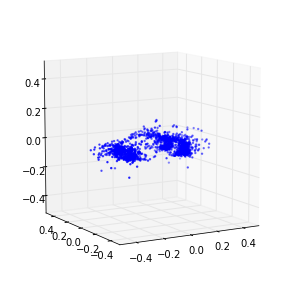

251 (0.74862182700393987, 2.2771995007591759) 47.579652071
252 (0.75881867320745588, 1.542470760793494) 48.0993790627
253 (0.42785411143062901, 2.1075512810841501) 48.2019941807
254 (0.5797878766819935, 2.5738640095563543) 48.0162811279
255 (0.33746086611043685, 2.6307025115761982) 47.9149820805
256 (0.67465705427047395, 2.8699516085970322) 48.0688290596
257 (1.1247542936529888, 1.052390372593131) 48.0095279217
258 (0.90557226828680748, 1.5929224839146505) 48.0084240437
259 (0.65646320901461097, 1.7058101684455103) 47.9945521355
260 (0.60539782337294334, 2.3178289464656139) 47.9380481243
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/car_mlp_arch_raw_gan_2048_pts/models.ckpt-260 is not in all_model_checkpoint_paths. Manually adding it.


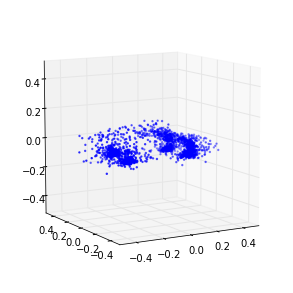

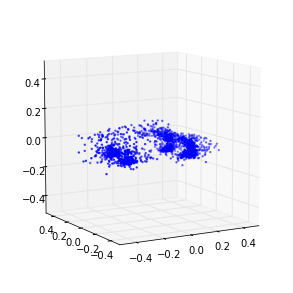

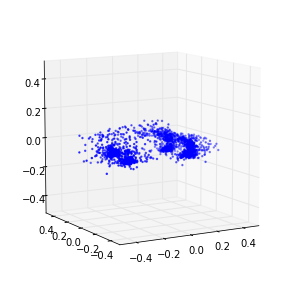

261 (0.28523787417942847, 3.5402605885627287) 47.6482100487
262 (0.52258600454602466, 2.7264461345320581) 47.9128909111
263 (0.47143700598870347, 2.6408003408636822) 47.903470993
264 (0.5106522065881115, 2.2763425339788399) 47.9824039936
265 (0.72685391740910954, 2.0281853919861299) 47.9179859161
266 (0.6665935409349083, 1.9876181963306145) 48.0692770481
267 (0.51692542538746888, 2.1791759129338617) 47.9987370968
268 (0.61577317188650171, 1.9729131172167376) 47.8708679676
269 (0.49794436421170329, 2.7207360019619835) 48.036864996
270 (0.6845372513236615, 1.937952634872206) 47.8632109165
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/car_mlp_arch_raw_gan_2048_pts/models.ckpt-270 is not in all_model_checkpoint_paths. Manually adding it.


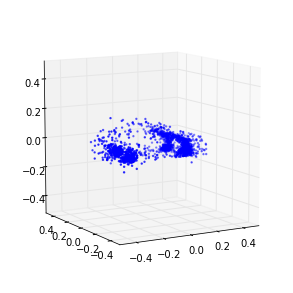

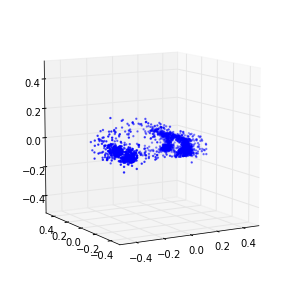

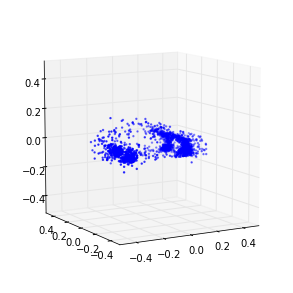

271 (0.4659381930860097, 2.1515751229036573) 47.5873081684
272 (0.63664312140653601, 2.1865478806047633) 48.1519608498
273 (0.65712071305153352, 1.9432783130831366) 48.2464420795
274 (0.53202630699480935, 2.0277749852046072) 47.8702759743
275 (0.86138229142099421, 1.498398524402772) 47.8584868908
276 (0.56092813531024344, 1.989547698289756) 47.9859290123
277 (0.38646867967541987, 2.9117656970184123) 48.003100872
278 (0.55393052451162528, 2.4667388344771108) 48.0392279625
279 (0.57392991044177299, 2.1883546049962908) 48.003387928
280 (0.52064128255084052, 2.1427568653285904) 47.9879078865
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/car_mlp_arch_raw_gan_2048_pts/models.ckpt-280 is not in all_model_checkpoint_paths. Manually adding it.


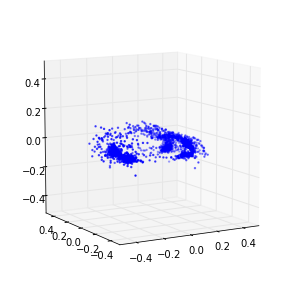

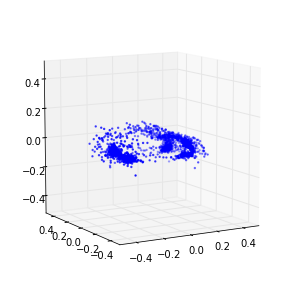

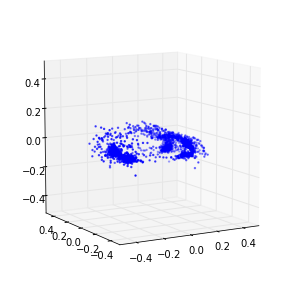

281 (0.40732456853725768, 3.0859476027872739) 47.7277448177
282 (0.54600495950087602, 2.030907530912617) 48.1500878334
283 (0.65016714433495626, 2.1704109207095716) 47.8878340721
284 (0.43200258900655197, 2.1658594152271347) 47.9203898907
285 (0.67926257183687799, 2.4342002412616806) 47.9281179905
286 (0.49827655507314123, 2.3104608294947835) 47.9536130428
287 (0.52150811635007799, 2.1979657251562847) 47.7732491493
288 (0.37539863071385648, 2.6990101857473388) 48.058647871
289 (0.56607218894282441, 2.3649446840254251) 47.9287600517
290 (0.71351205592587486, 1.5398105078895621) 47.9251830578
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/car_mlp_arch_raw_gan_2048_pts/models.ckpt-290 is not in all_model_checkpoint_paths. Manually adding it.


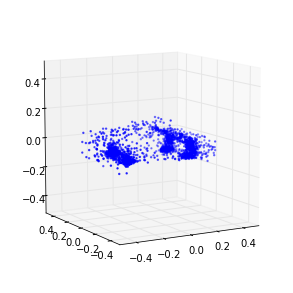

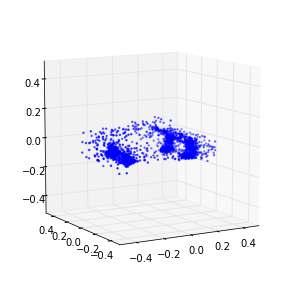

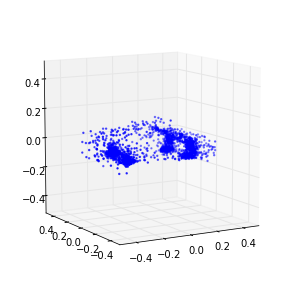

291 (0.69744425011961253, 1.7358447017285648) 47.7221710682
292 (0.33888869277582873, 2.5899684365163713) 47.8976581097
293 (0.56202750343004326, 2.2999524902177337) 47.7627530098
294 (0.54119208790111861, 2.5393532578577132) 47.929309845
295 (0.55820840229624069, 2.5315863630115585) 47.8199710846
296 (0.4810874786402955, 2.0879362757573992) 47.6758790016
297 (0.081823986911233645, 3.6494985346826132) 47.9656019211
298 (1.0353688469669162, 2.1137238812926631) 47.9922020435
299 (0.70304806960509125, 1.829428072743768) 47.8150649071
300 (0.66488794572401366, 1.6423569769667299) 48.0444390774
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/car_mlp_arch_raw_gan_2048_pts/models.ckpt-300 is not in all_model_checkpoint_paths. Manually adding it.


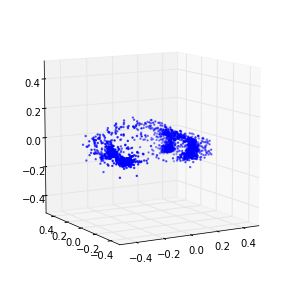

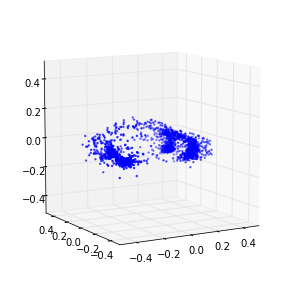

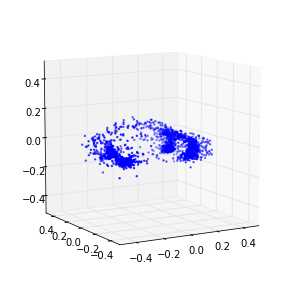

301 (0.50465492134126244, 2.1237770238978753) 47.6395521164
302 (0.55191323333638631, 2.6183586280617939) 48.0855660439
303 (0.66903662891595961, 2.0233470009477346) 47.9054980278
304 (0.68194492921333183, 2.0213875154520839) 47.7913169861
305 (0.69466777625899989, 1.7801379037383418) 47.8966481686
306 (0.61409950388857981, 2.5421323984261326) 47.8015031815
307 (0.70662726631900608, 1.7528948191828375) 47.8940498829
308 (0.28467384408284352, 2.9540844051629906) 47.9245080948
309 (0.32826900757199168, 3.0599545600430278) 47.9222691059
310 (0.23720190844079792, 3.3698852902290803) 47.8740670681
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/car_mlp_arch_raw_gan_2048_pts/models.ckpt-310 is not in all_model_checkpoint_paths. Manually adding it.


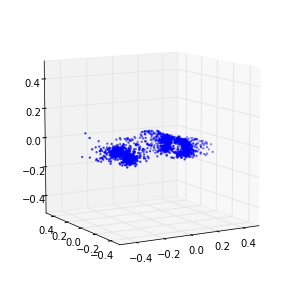

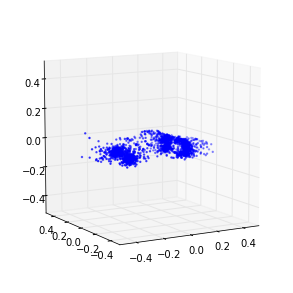

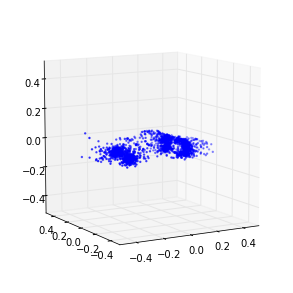

311 (0.86208638798870496, 1.6513002242817976) 47.5886731148
312 (0.87740187316932938, 1.6107281798484341) 48.091919899
313 (0.53636406657079727, 2.2658913175531681) 47.9117290974
314 (0.5384221719765423, 2.5415742613325185) 47.9299931526
315 (0.14106000637348065, 2.7537781520177855) 47.9072849751
316 (0.020930562143357808, 3.9407057826150984) 47.7617430687
317 (0.016757547430344077, 4.1215767060350252) 47.8134229183
318 (0.020638951869218942, 4.5277486983561674) 47.8821539879
319 (0.0062225467639493966, 5.5717232499346636) 47.8526608944
320 (0.03335890117267009, 6.3992468334684434) 47.8394150734
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/car_mlp_arch_raw_gan_2048_pts/models.ckpt-320 is not in all_model_checkpoint_paths. Manually adding it.


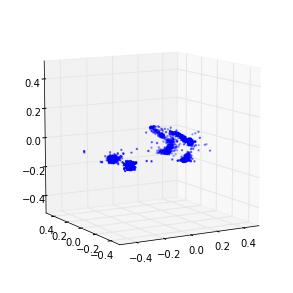

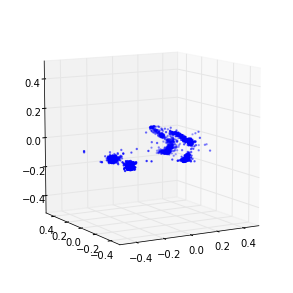

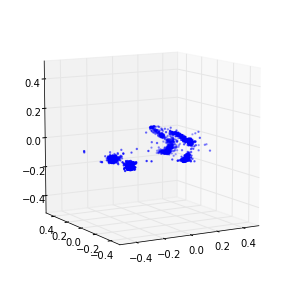

321 (0.59385620810532158, 4.4766568393515263) 47.672342062
322 (0.5717541127896949, 3.4100390200646933) 47.8886201382
323 (0.44101173575692532, 2.8645340740280663) 48.0044679642
324 (0.44253530908350974, 2.9814514769803759) 48.1049718857
325 (0.55505883393671684, 3.2222865563911078) 47.9239399433
326 (0.5674811548634664, 2.958861715041551) 47.9056870937
327 (0.379014185411018, 2.6257858196360955) 47.8597249985
328 (0.46020604062500414, 2.909648774854289) 48.0983159542
329 (0.58816211985661682, 2.8185048119333764) 47.9879961014
330 (0.50683419888951631, 2.5987801635825396) 48.0040481091
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/car_mlp_arch_raw_gan_2048_pts/models.ckpt-330 is not in all_model_checkpoint_paths. Manually adding it.


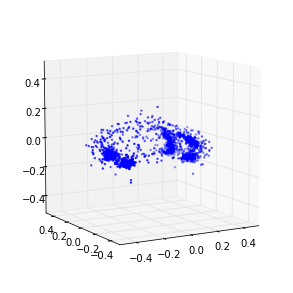

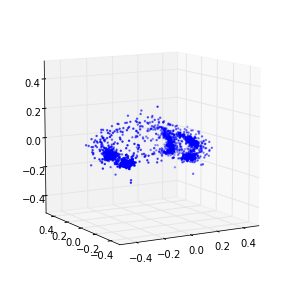

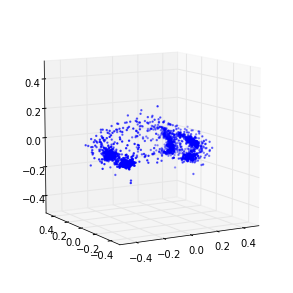

331 (0.22691658589263891, 3.3058359558950334) 47.6170179844
332 (0.4292964756538804, 3.4252324872368933) 48.012887001
333 (0.3544356513943448, 3.0177264525586325) 48.1043968201
334 (0.38203047260942075, 3.0707764241519389) 47.9666950703
335 (0.37782690334040048, 3.2722645829988006) 47.9237029552
336 (0.3406991247562754, 3.0095114411923709) 47.8403968811
337 (0.53799253052113039, 3.3997268124714792) 47.9736549854
338 (0.52815412694975838, 2.8946078879721213) 47.8629848957
339 (0.35062666192350772, 3.0060314708108069) 47.9613518715
340 (0.73716948806439475, 2.3270163000030006) 47.9658741951
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/car_mlp_arch_raw_gan_2048_pts/models.ckpt-340 is not in all_model_checkpoint_paths. Manually adding it.


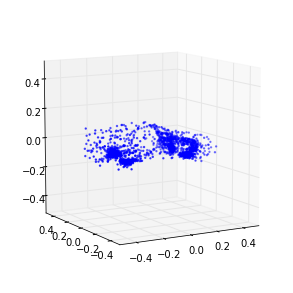

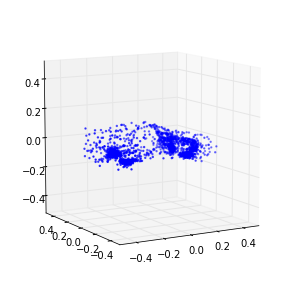

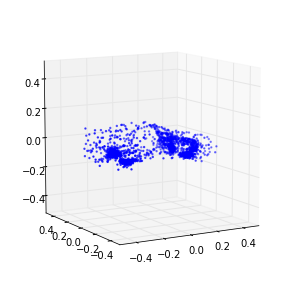

341 (0.58100470625514156, 1.8958603087687653) 47.6633379459
342 (0.35423762866314623, 2.9633726849651976) 47.8920209408
343 (0.35885962283851314, 3.1331186238551298) 47.9612939358
344 (0.38163524786097891, 3.235577351294908) 48.0288209915
345 (0.31613032749835279, 3.2198704193102432) 47.9040079117
346 (0.34467969379769076, 3.0068094498359117) 47.8880269527
347 (0.30967107395197724, 3.1307870669652953) 47.9975731373
348 (0.78566852031938184, 2.8192827953588244) 47.8266270161
349 (0.77669238694162179, 1.9745945902478774) 48.0372331142
350 (0.49939838511831808, 1.922784459670918) 47.8974790573
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/car_mlp_arch_raw_gan_2048_pts/models.ckpt-350 is not in all_model_checkpoint_paths. Manually adding it.


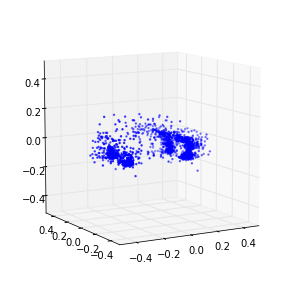

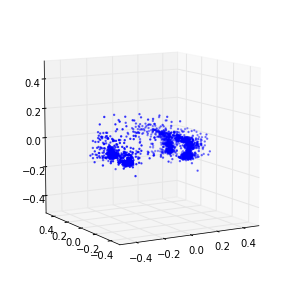

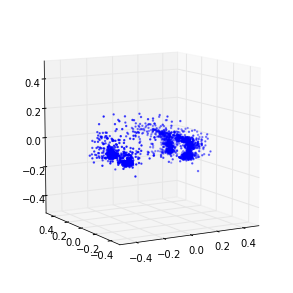

351 (0.72932071278759292, 1.9677744023751893) 47.5968592167
352 (0.34276663351979031, 2.9659832916003745) 48.0058510303
353 (0.28539327129521624, 3.4843843711302585) 47.9379990101
354 (0.46775508747004824, 2.9105789909426796) 47.6976659298
355 (0.58475798348452424, 2.7005070631936094) 47.8732879162
356 (0.42878357341025497, 2.5465972127530399) 47.8020920753
357 (0.38452806138752293, 3.0488527373179495) 47.8873870373
358 (0.31052190610426383, 2.967647517287491) 47.8220112324
359 (0.32482591152641199, 3.8669306139817974) 47.93069911
360 (0.42704962859017737, 2.7201854926627753) 47.8742370605
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/car_mlp_arch_raw_gan_2048_pts/models.ckpt-360 is not in all_model_checkpoint_paths. Manually adding it.


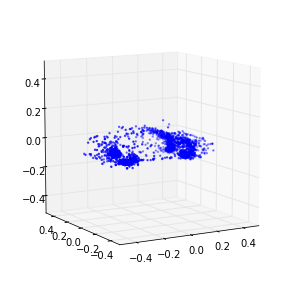

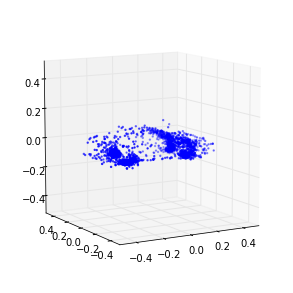

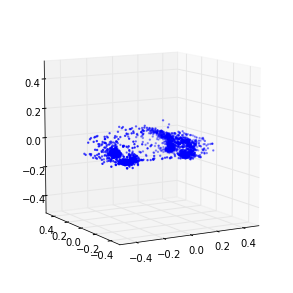

361 (0.56273655438383152, 2.4942107156619131) 47.7862739563
362 (0.66008217262741709, 2.0901481705223954) 47.883710146
363 (0.58224172870184754, 2.077703838380391) 47.9791381359
364 (0.28223512624234159, 3.4054936610612292) 47.828756094
365 (0.39763852076342443, 3.0071039615861523) 47.9552431107
366 (0.34055866736093626, 2.8731217144319676) 47.8092617989
367 (0.43604494371270175, 2.5731740705918944) 47.8772380352
368 (0.38820949251819775, 3.0896251369642731) 47.7988917828
369 (0.4299404886894978, 2.9804665390277068) 47.8633079529
370 (0.43790854823669328, 2.6133151262398533) 48.0230798721
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/car_mlp_arch_raw_gan_2048_pts/models.ckpt-370 is not in all_model_checkpoint_paths. Manually adding it.


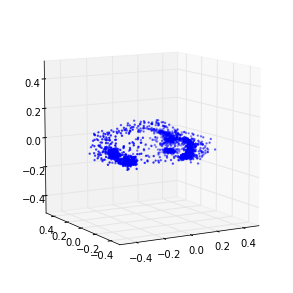

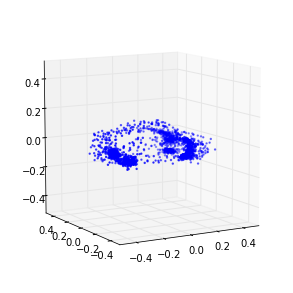

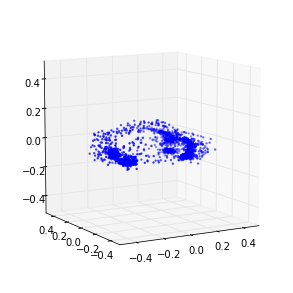

371 (0.41645997745178692, 2.4952462279556582) 47.5240769386
372 (0.11755350782167191, 3.533255185056853) 48.1189558506
373 (0.6730782913244111, 3.6326131420647538) 47.8584871292
374 (0.96629728526877079, 1.1484707613919405) 48.0743839741
375 (0.58527833803388096, 1.6740081342274711) 47.9676671028
376 (0.49454820666137156, 2.2074605290521712) 48.0441520214
377 (0.424225369155807, 2.7169783491416264) 47.7382891178
378 (0.4901986311646116, 2.8147152010226408) 47.9600551128
379 (0.048090392961198054, 4.0194878962215963) 47.8185629845
380 (0.022877418845516924, 4.8744702243164886) 47.778429985
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/car_mlp_arch_raw_gan_2048_pts/models.ckpt-380 is not in all_model_checkpoint_paths. Manually adding it.


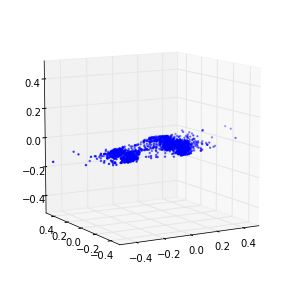

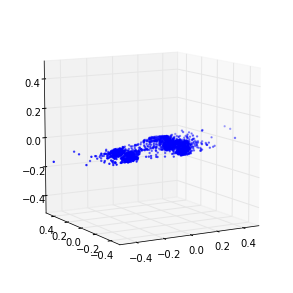

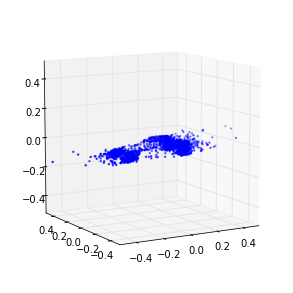

381 (0.017645525447586737, 5.2429003059464012) 47.6150689125
382 (0.45515000052600096, 4.5191046047530721) 47.8642311096
383 (0.42699948328253406, 3.3738553602023411) 48.0210471153
384 (0.34214969999438166, 3.1686425329054764) 47.9100141525
385 (0.30525657917129112, 3.2463326470163842) 47.8840680122
386 (0.32185049868820098, 3.5758101788143182) 47.8910491467
387 (0.44192891312925608, 2.7017756964536321) 47.9390587807
388 (0.33586850745490932, 3.6600448757210033) 47.8866741657
389 (0.50802906817637838, 2.7938394930538717) 47.8395428658
390 (0.52986300841673906, 2.4773144361956807) 47.913670063
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/car_mlp_arch_raw_gan_2048_pts/models.ckpt-390 is not in all_model_checkpoint_paths. Manually adding it.


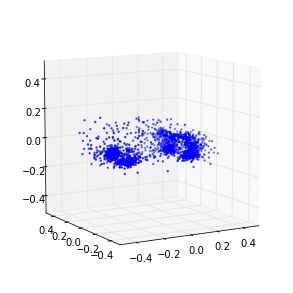

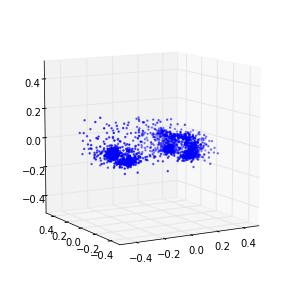

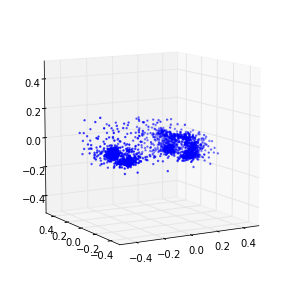

391 (0.56868623087070136, 1.7993306881629381) 47.5387380123
392 (0.37869911715888338, 2.619066015185926) 48.0791881084
393 (0.42890202089044072, 3.1963904704023527) 47.8668780327
394 (0.2322596129180001, 3.7531031026136157) 47.9458291531
395 (0.35987083503863954, 2.8610237020774174) 47.8315219879
396 (0.36787979064771792, 3.3691530763702904) 47.9180538654
397 (0.31443218311807453, 3.3888701600516402) 47.9521501064
398 (0.34679040547785345, 3.2641105987881653) 47.9567420483
399 (0.22112275128121545, 3.6689390384110827) 47.9480619431
400 (0.26787909137822635, 3.3336768814381337) 47.963793993
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/car_mlp_arch_raw_gan_2048_pts/models.ckpt-400 is not in all_model_checkpoint_paths. Manually adding it.


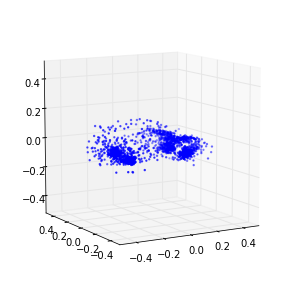

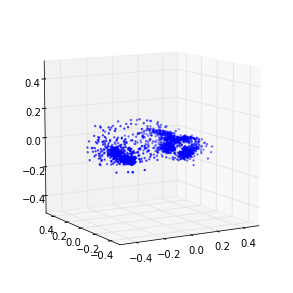

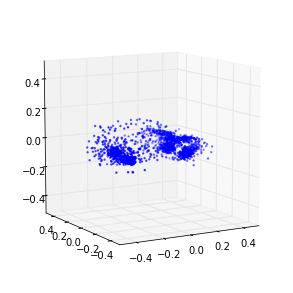

401 (0.31700712422396515, 3.5155299485929858) 47.5603840351
402 (0.36236881174697172, 2.8482262456177065) 48.1217610836
403 (0.47528363381756233, 2.8883673232673797) 48.034126997
404 (0.35549364899028868, 3.3521337277137193) 47.874049902
405 (0.47846688090154788, 2.6317795491058553) 48.0072607994
406 (0.3379417433834716, 2.8224613598529125) 48.0035090446
407 (0.27511964773371717, 3.3010719014494212) 47.8272910118
408 (0.51812470991839499, 3.5364325886604768) 47.9655170441
409 (0.39872936994437402, 2.5024353401772927) 47.832431078
410 (0.38108689815506042, 2.8048481781210675) 47.8990700245
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/car_mlp_arch_raw_gan_2048_pts/models.ckpt-410 is not in all_model_checkpoint_paths. Manually adding it.


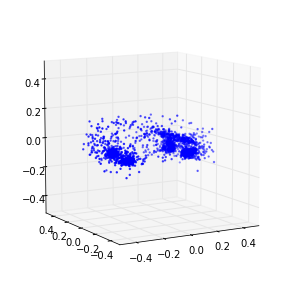

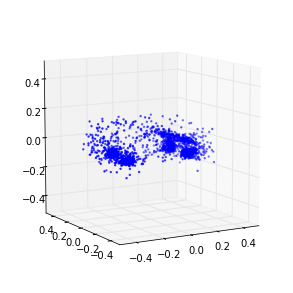

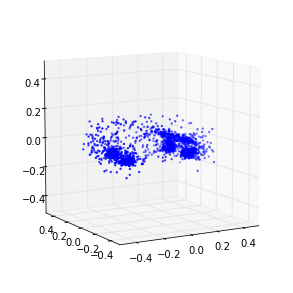

411 (0.32607534445272196, 3.2972506324716861) 47.5915279388
412 (0.47579699813469545, 3.273680745355235) 47.9359240532
413 (0.3602048158020581, 3.4042593824783429) 47.8865289688
414 (0.40782502006064325, 3.189854355466446) 47.9110000134
415 (0.26295302824536027, 3.1020016110183408) 47.953674078
416 (0.80407557196465118, 2.4127418050829994) 47.8841030598
417 (0.49114255137091517, 1.8732126351170892) 47.9729239941
418 (0.4980813900896367, 2.1058436800169464) 47.8163871765
419 (0.56724242345998754, 2.2950592153024352) 48.0415108204
420 (0.41628141031169252, 2.5565423581424174) 47.8299720287
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/car_mlp_arch_raw_gan_2048_pts/models.ckpt-420 is not in all_model_checkpoint_paths. Manually adding it.


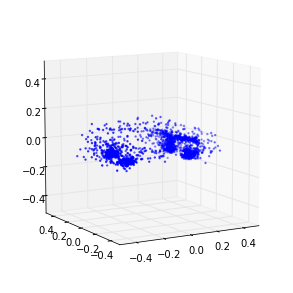

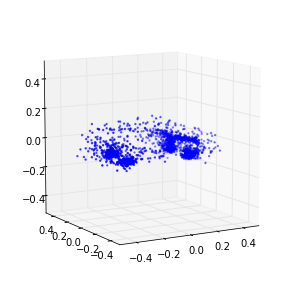

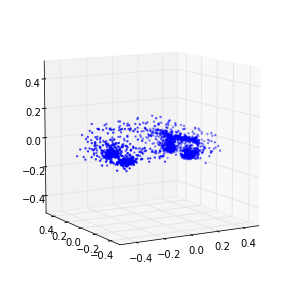

421 (0.27746421688755085, 3.1117823539964307) 47.5449249744
422 (0.4690762670248147, 2.4741660804556522) 47.8350009918
423 (0.46228187388721731, 2.8239700754216854) 48.0966880322
424 (0.49488464452876341, 2.5237726537173226) 47.8355190754
425 (0.58343661371493505, 2.5130141117428773) 47.9361109734
426 (0.49625341099180631, 2.6093148201103977) 47.9338159561
427 (0.32568121621472723, 2.8619772867868409) 47.9634501934
428 (0.53958100270504916, 2.3620169562781417) 47.7780771255
429 (0.53526569502865706, 2.9816463321647388) 47.6611249447
430 (0.57571869993569869, 1.941941536912982) 47.9656879902
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/car_mlp_arch_raw_gan_2048_pts/models.ckpt-430 is not in all_model_checkpoint_paths. Manually adding it.


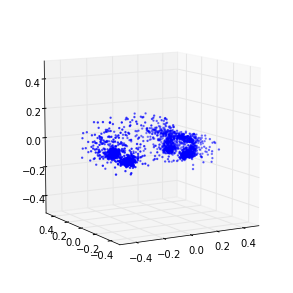

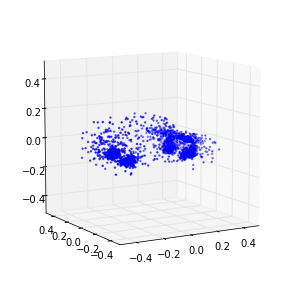

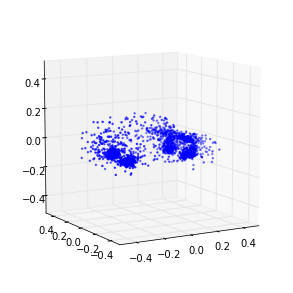

431 (0.37104422224048, 2.8447859871307477) 47.589261055
432 (0.23472622644481242, 3.112331021552118) 47.918888092
433 (0.29101491300389171, 4.4196867254756445) 47.995126009
434 (1.1700765322518829, 1.4026149499336344) 47.9236450195
435 (0.52070308111658037, 1.980408764925579) 48.0185010433
436 (0.42320774760622304, 2.5388251207018859) 47.7804629803
437 (0.41430317445489384, 2.5422011653848942) 47.875084877
438 (0.42341019498221827, 3.01508277374626) 47.9857120514
439 (0.40346757092531893, 2.6081728599215515) 47.7950119972
440 (0.52961767552382999, 2.8504343496873075) 48.000480175
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/car_mlp_arch_raw_gan_2048_pts/models.ckpt-440 is not in all_model_checkpoint_paths. Manually adding it.


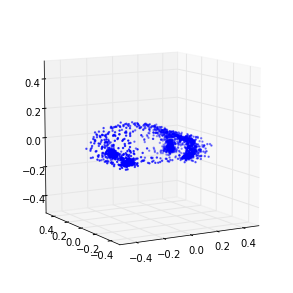

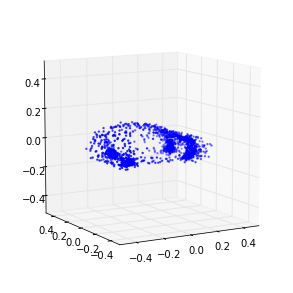

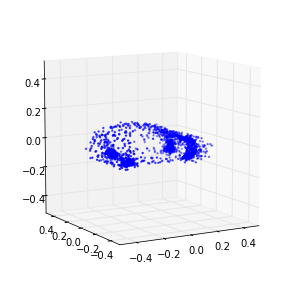

441 (0.26578472097148031, 2.8302960211798647) 47.5401279926
442 (0.63314682130245559, 2.2827076103863302) 47.5820550919
443 (0.78623544064744211, 1.9647391994527523) 47.3719558716
444 (0.57763518203024899, 1.8416895442360999) 47.3526349068
445 (0.52526546454669643, 2.2760416949355364) 47.3621070385
446 (0.57341312062020267, 2.3447880232894183) 47.3395938873
447 (0.41525687862362637, 3.0331191632571635) 47.3623609543
448 (0.66101331238778649, 1.5520703284532431) 47.3674690723
449 (0.35231595051368608, 2.562094722818208) 47.4165248871
450 (0.36225233732053896, 2.8884037293043714) 47.3548829556
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/car_mlp_arch_raw_gan_2048_pts/models.ckpt-450 is not in all_model_checkpoint_paths. Manually adding it.


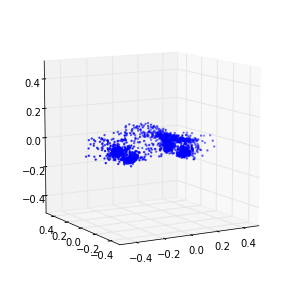

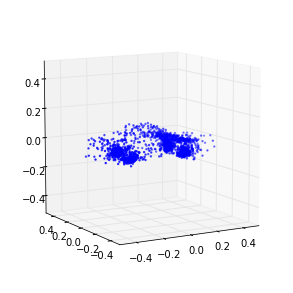

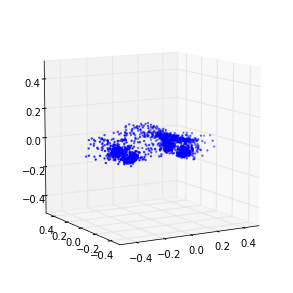

451 (0.36805305392450133, 3.522109519715277) 47.3188970089
452 (0.43615511442290855, 3.6356406709891838) 47.365500927
453 (0.59337664570584392, 2.3909835199381679) 47.4028060436
454 (0.57390870543934358, 2.257118941953518) 47.3464660645
455 (0.41119180899738467, 2.6345964854195616) 47.3348910809
456 (0.53903868044382774, 2.4570136416278427) 47.4023590088
457 (0.31932503296274867, 2.7818942174015429) 47.3701040745
458 (0.53044221917754852, 2.7646181367387705) 47.3733451366
459 (0.47111914101863067, 2.1896464008612919) 47.3759520054
460 (0.69110933566253452, 2.14169506418625) 47.3695349693
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/car_mlp_arch_raw_gan_2048_pts/models.ckpt-460 is not in all_model_checkpoint_paths. Manually adding it.


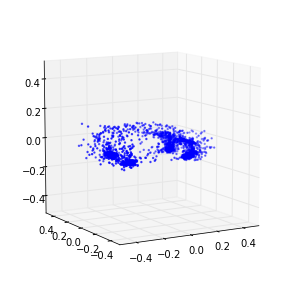

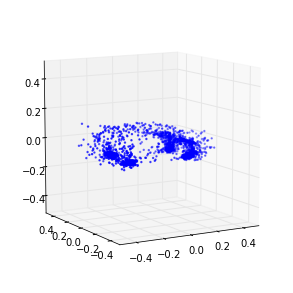

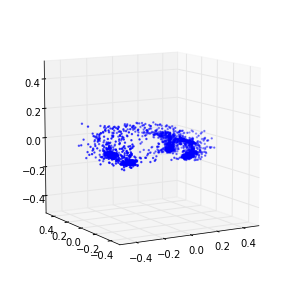

461 (0.37529197655268165, 2.7934844477864722) 47.3220100403
462 (0.28699867076071717, 2.9581519869349946) 47.3774721622
463 (0.36258785670385663, 4.4022568184257356) 47.4361419678
464 (0.74257779531430879, 1.8916974467719161) 47.4328119755
465 (0.39682773960716772, 2.4680586917288352) 47.3737399578
466 (0.4500911547333602, 2.7395756556683737) 47.3513009548
467 (0.53474192851341806, 2.7538483086848418) 47.3742959499
468 (0.60064756670254194, 2.2853012589000214) 47.3461799622
469 (0.34138432355135079, 2.4526144666159713) 47.3447659016
470 (0.37187127903378847, 3.3785632040676656) 47.2874670029
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/car_mlp_arch_raw_gan_2048_pts/models.ckpt-470 is not in all_model_checkpoint_paths. Manually adding it.


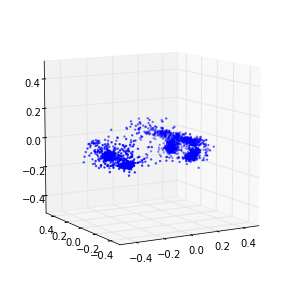

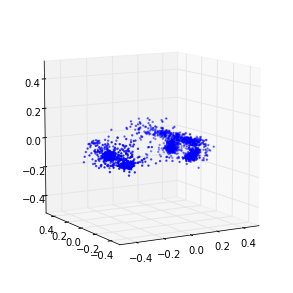

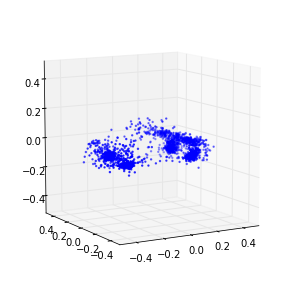

471 (0.57410409356523684, 2.9081258157755703) 47.3439178467
472 (0.59654350761299169, 3.6578999536749501) 47.4087917805
473 (0.32654893083260361, 2.7572953973040484) 47.3999590874
474 (0.7902967536809461, 2.6552698272186639) 47.3757150173
475 (0.63544707180269611, 1.9514040794948604) 47.3616161346
476 (0.42191757811795944, 2.5001697356268862) 47.3352401257
477 (0.58006954408131994, 2.5367441161366919) 47.3158111572
478 (0.44558738752099492, 2.4607145098231782) 47.3196840286
479 (0.62825057385551852, 2.3348987198516027) 47.3448939323
480 (0.49029389483816671, 2.3486829668083447) 47.3517420292
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/car_mlp_arch_raw_gan_2048_pts/models.ckpt-480 is not in all_model_checkpoint_paths. Manually adding it.


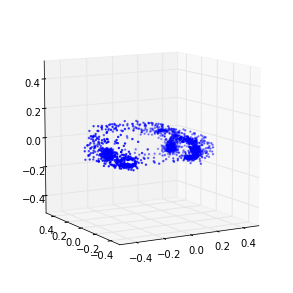

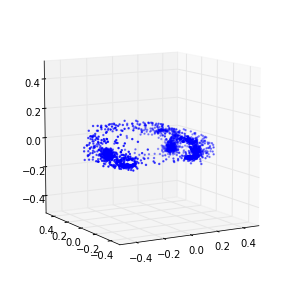

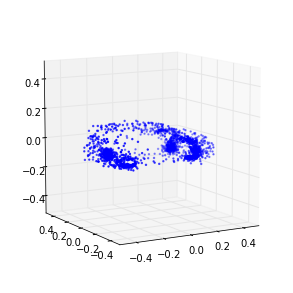

481 (0.51428766898660849, 2.1951840931937197) 47.2784771919
482 (0.36219267312112269, 2.7859504990929724) 47.361342907
483 (0.34168686619615996, 3.8720671650547311) 47.3444108963
484 (0.3093351588253207, 2.6115031362379959) 47.3404169083
485 (0.59057825539986164, 3.1128048448754635) 47.3134298325
486 (0.35809958901181316, 2.6968837808442596) 47.4198009968
487 (0.37715972088677369, 3.2844337016944118) 47.3987729549
488 (0.28705880989714355, 3.1073024272918701) 47.2999351025
489 (0.077335666193183036, 4.4853595359213401) 47.239331007
490 (0.048487146072489704, 5.5813277807811765) 47.2149548531
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/car_mlp_arch_raw_gan_2048_pts/models.ckpt-490 is not in all_model_checkpoint_paths. Manually adding it.


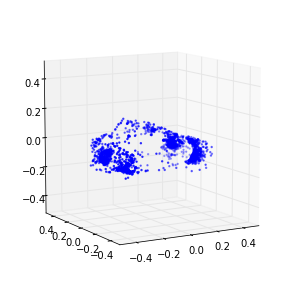

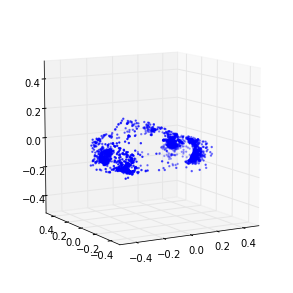

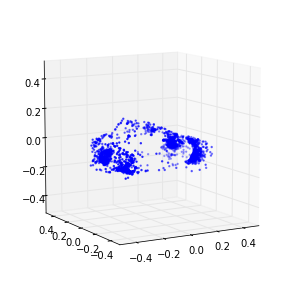

491 (0.048967601230989942, 6.2912857772519928) 47.2835710049
492 (0.029221429432126626, 5.8235939765136511) 47.3684029579
493 (0.01712000424443938, 5.5455590990565771) 47.3569250107
494 (0.0044751773110197094, 5.7648612220815361) 47.2849180698
495 (0.0034278820943862399, 5.8275755747852713) 47.2616438866
496 (0.0075719187737578499, 6.3984192105747706) 47.1756989956
497 (0.096298212517608006, 8.2710933621297755) 47.2479050159
498 (0.025937154516519123, 6.9743844614732984) 47.322273016
499 (0.0016907063905062191, 6.5118226524967477) 47.3190770149
500 (0.0013361073305342822, 6.6604853412448959) 47.2709131241
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/car_mlp_arch_raw_gan_2048_pts/models.ckpt-500 is not in all_model_checkpoint_paths. Manually adding it.


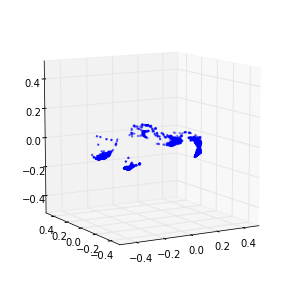

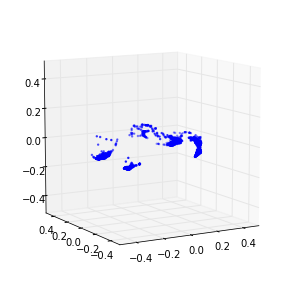

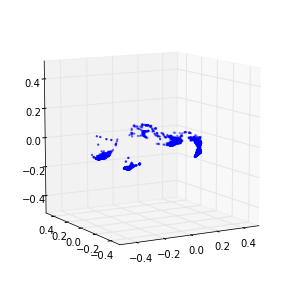

501 (0.1048042447669829, 7.3987642518625965) 47.2485349178
502 (0.8011129729624763, 3.6431981957198789) 47.3375039101
503 (0.4393522837418038, 2.6296503647861864) 47.3298969269
504 (0.32976537682866092, 3.1200929608121015) 47.311631918
505 (0.27234313123228165, 3.5788252417673201) 47.3064439297
506 (0.3879002061166219, 2.9897055681919893) 47.3198580742
507 (0.38330025098367826, 3.4484671818329984) 47.3351428509
508 (0.46069728158064338, 3.2732245890086129) 47.3712871075
509 (0.38126144053151945, 2.7214476198158009) 47.403263092
510 (0.34473290856952638, 3.1712505233367816) 47.3160748482
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/car_mlp_arch_raw_gan_2048_pts/models.ckpt-510 is not in all_model_checkpoint_paths. Manually adding it.


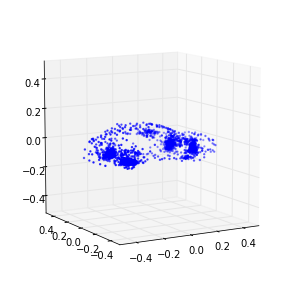

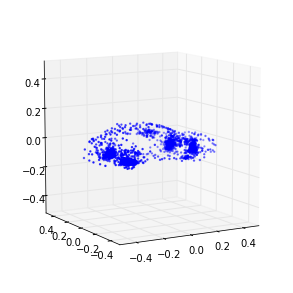

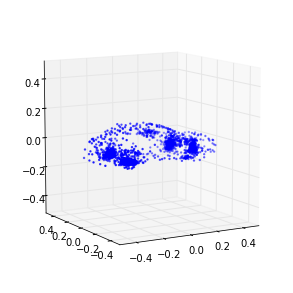

511 (0.22608241797643619, 3.4554200148422445) 47.3357479572
512 (0.27484501308242748, 4.102307020417796) 47.4310231209
513 (0.16286120524992478, 3.5204035243732017) 47.4259059429
514 (0.68284269942958287, 3.3183056860162106) 47.3044528961
515 (0.32245292159534938, 3.1756336120951096) 47.301692009
516 (0.28485715868039019, 3.7307565444267836) 47.3483469486
517 (0.37833756950977665, 2.8270471368060015) 47.3444788456
518 (0.46191273340580347, 3.4603358507156372) 47.3335180283
519 (0.17419268592142018, 3.4412552670344412) 47.3592991829
520 (0.16447060212692957, 3.6536259955207773) 47.3196270466
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/car_mlp_arch_raw_gan_2048_pts/models.ckpt-520 is not in all_model_checkpoint_paths. Manually adding it.


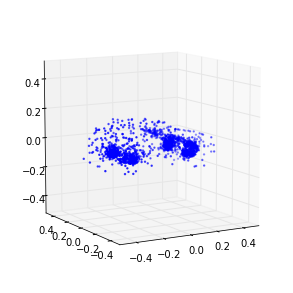

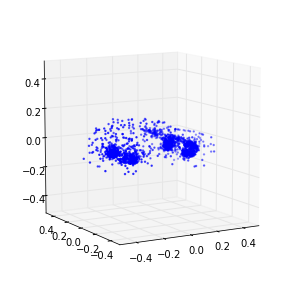

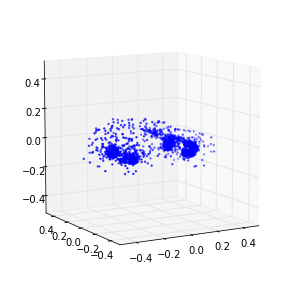

521 (0.14058903757257749, 4.1475487619438427) 47.2982010841
522 (0.20042456163956016, 3.3747815429764305) 47.2955698967
523 (0.10656843354437975, 4.2778706822619341) 47.2929179668
524 (0.50283843618520729, 4.144533072542024) 47.3645908833
525 (0.31777411444275172, 3.0437364362230235) 47.3240258694
526 (0.29748609294527328, 3.1359563753908914) 47.3352499008
527 (0.46701384350757469, 2.8968481265458483) 47.3107509613
528 (0.22663271612168959, 3.6415182768098462) 47.2920041084
529 (0.56895052946653946, 3.203607377589949) 47.3163990974
530 (0.20550552394316102, 3.4691986765637495) 47.3159360886


In [ ]:
if do_training:
    for _ in range(max_epochs + 1):
        loss, duration = gan._single_epoch_train(training_data, batch_size, noise_params, adaptive=adaptive_training)
        epoch = int(gan.sess.run(gan.epoch.assign_add(tf.constant(1.0))))
        print epoch, loss, duration
        if save_model and epoch % 10 == 0:
            checkpoint_path = osp.join(train_dir, model_saver_id)
            gan.saver.save(gan.sess, checkpoint_path, global_step=gan.epoch)
            syn_d = gan.generate(n_syn_samples, noise_params)
            accum_syn_data.append(syn_d)
            for k in range(3):
                Point_Cloud(syn_d[k]).plot(in_u_sphere=True)
        train_stats.append((epoch,) + loss)

In [ ]:
epoch_to_check = 1500
n_check = 5
check_data = accum_syn_data[(epoch_to_check / 10)-1]
rids = np.random.choice(range(len(check_data)), size=n_check, replace=False)
for i in range(n_check):
    Point_Cloud(check_data[rids[i]]).plot(in_u_sphere=True)    

In [ ]:
if do_plotting:
    x = range(len(train_stats))
    d_loss = [t[1] for t in train_stats]
    g_loss = [t[2] for t in train_stats]
    plt.plot(x, d_loss)
    plt.plot(x, g_loss)
    plt.title('Raw GAN training. (%s, %s)' % (class_name, arch_tag) )
    plt.legend(['d_loss', 'g_loss'], loc=0)
    plt.xlabel('Epochs.')
    plt.ylabel('Loss.')

In [ ]:
synthetic_data_out_dir = '/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/nips/our_synthetic_samples/'
saver_step = 10
if save_synthetic_samples:
    save_dir = osp.join(synthetic_data_out_dir, experiment_name)
    create_dir(save_dir)    
    for i, d in enumerate(accum_syn_data):
        epoc = str((i + 1) * saver_step)
        np.savez(osp.join(save_dir, 'epoch_' + epoc), d)